In [128]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # nr of words to consider as features
maxlen = 300 # cuts off the text after this nr of words among the most common words, i.e. 'max_features'

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =max_features) # loads the data as list of integers

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) # turns the list of integers above into a 2D integer tensor of shape (samples, maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) # (same as for x_train)

In [129]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen)) 



model.add(Flatten()) # Flattens the 3D tensor of embeddings (=(samples, maxlen, 8)) into a 2D tensor of shape (samples,maxlen*8)

model.add(Dense(1, activation="sigmoid")) 
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 300, 8)            80000     
_________________________________________________________________
flatten_10 (Flatten)         (None, 2400)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2401      
Total params: 82,401
Trainable params: 82,401
Non-trainable params: 0
_________________________________________________________________


In [130]:
history = model.fit(x_train, y_train, epochs=5, batch_size=500, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - ETA: 16s - loss: 0.6952 - acc: 0.45 - ETA: 4s - loss: 0.6945 - acc: 0.4800 - ETA: 2s - loss: 0.6941 - acc: 0.489 - ETA: 1s - loss: 0.6935 - acc: 0.501 - ETA: 1s - loss: 0.6933 - acc: 0.504 - ETA: 0s - loss: 0.6930 - acc: 0.506 - ETA: 0s - loss: 0.6929 - acc: 0.509 - ETA: 0s - loss: 0.6928 - acc: 0.511 - ETA: 0s - loss: 0.6924 - acc: 0.516 - ETA: 0s - loss: 0.6922 - acc: 0.517 - ETA: 0s - loss: 0.6917 - acc: 0.525 - ETA: 0s - loss: 0.6913 - acc: 0.530 - 1s 60us/step - loss: 0.6908 - acc: 0.5345 - val_loss: 0.6842 - val_acc: 0.5706
Epoch 2/5
20000/20000 [==============================] - ETA: 0s - loss: 0.6792 - acc: 0.598 - ETA: 0s - loss: 0.6787 - acc: 0.605 - ETA: 0s - loss: 0.6773 - acc: 0.636 - ETA: 0s - loss: 0.6751 - acc: 0.650 - ETA: 0s - loss: 0.6741 - acc: 0.646 - ETA: 0s - loss: 0.6727 - acc: 0.654 - ETA: 0s - loss: 0.6710 - acc: 0.659 - ETA: 0s - loss: 0.6690 - acc: 0.666

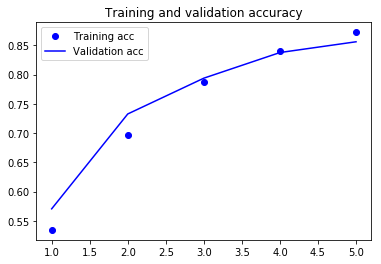

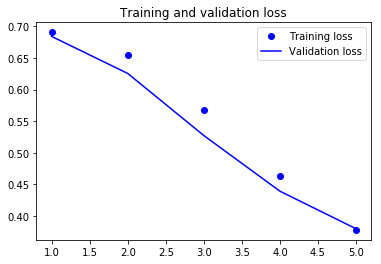

In [131]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [132]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [133]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [134]:
# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [135]:
# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


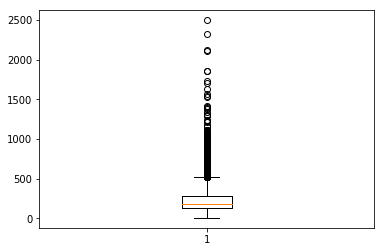

In [136]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

In [141]:
import os

imdb_dir = "aclImdb"
train_dir = os.path.join(imdb_dir, "test")

labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname [-4:] == ".txt":
            
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)

In [142]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing. sequence import pad_sequences
import numpy as np

maxlen = 500 
training_samples = 1000 # Trains on 1000 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index                   
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered: 
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] 
y_train = labels[:training_samples] 
x_val = data[training_samples:training_samples+validation_samples] 
y_val = labels[training_samples:training_samples+validation_samples] 




Found 72633 unique tokens.
Shape of data tensor: (17243, 500)
Shape of label tensor: (17243,)


In [143]:
glove_dir = "C:/Users/SHREYA GANESH/Desktop/NEURAL 3/glove.6B.zip"

embeddings_index = {}

f = open(("glove.6B.100d.txt"), encoding='utf-8') #added , encoding='utf-8'
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

print("found %s word vectors." % len (embeddings_index))

found 400000 word vectors.


In [146]:
embedding_dim = 100 # GloVe contains 100-dimensional embedding vectors for 400.000 words

embedding_matrix = np.zeros((max_words, embedding_dim)) # embedding_matrix.shape (10000, 100)
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) # embedding_vector.shape (100,)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector 

In [147]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen)) 
model.add(Flatten()) 
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid")) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 500, 100)          1000000   
_________________________________________________________________
flatten_12 (Flatten)         (None, 50000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1600032   
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 2,600,065
Trainable params: 2,600,065
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [149]:
model.compile(optimizer = "rmsprop", 
              loss = "binary_crossentropy", 
              metrics = ["acc"]) 
history = model.fit(x_train, y_train,
                   epochs = 5,
                   batch_size = 10,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")

Train on 1000 samples, validate on 10000 samples
Epoch 1/5
1000/1000 [==============================] - ETA: 50s - loss: 0.6189 - acc: 0.60 - ETA: 18s - loss: 2.5723 - acc: 0.70 - ETA: 12s - loss: 2.8883 - acc: 0.72 - ETA: 9s - loss: 2.6441 - acc: 0.7286 - ETA: 7s - loss: 2.1903 - acc: 0.700 - ETA: 6s - loss: 2.0039 - acc: 0.709 - ETA: 6s - loss: 1.8069 - acc: 0.715 - ETA: 5s - loss: 1.6494 - acc: 0.726 - ETA: 5s - loss: 1.5586 - acc: 0.723 - ETA: 4s - loss: 1.4626 - acc: 0.715 - ETA: 4s - loss: 1.3953 - acc: 0.709 - ETA: 4s - loss: 1.3309 - acc: 0.708 - ETA: 4s - loss: 1.2849 - acc: 0.692 - ETA: 3s - loss: 1.2409 - acc: 0.696 - ETA: 3s - loss: 1.2029 - acc: 0.696 - ETA: 3s - loss: 1.1696 - acc: 0.712 - ETA: 3s - loss: 1.1404 - acc: 0.718 - ETA: 3s - loss: 1.1147 - acc: 0.717 - ETA: 3s - loss: 1.0916 - acc: 0.718 - ETA: 2s - loss: 1.0709 - acc: 0.717 - ETA: 2s - loss: 1.0525 - acc: 0.709 - ETA: 2s - loss: 1.0354 - acc: 0.709 - ETA: 2s - loss: 1.0203 - acc: 0.706 - ETA: 2s - loss: 1.004

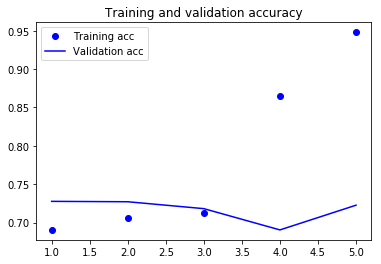

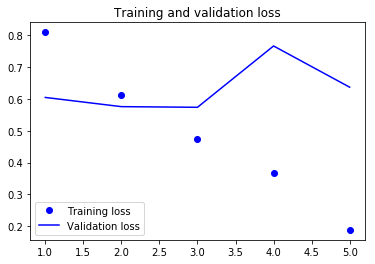

In [150]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()